In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) #50 for truncated view, -1 for full view

In [2]:
df = pd.read_pickle('dataset/clean_dataset.pkl')

## Feature Selection

### 1st Method

Check feature with a variance equal to zero

In [3]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('Normal/Attack')
cols_numeric.remove('index')
for col in cols_numeric:
    var = np.var(df[col])
    if var == 0:
        print(col)
        cols_numeric.remove(col)

P202
P401
P404
P502
P601
P603


remove feature with variance of 0

In [4]:
df = df.drop(columns=['P202','P401','P404','P502','P601','P603'])

### 2nd Method : Filter methods

A. Anova feature selection : check variance to verify if there is a significant difference between groups

In [7]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('Normal/Attack')
cols_numeric.remove('index')
data = df[cols_numeric]
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

# https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 1852.742661
Feature 1: 2755.932335
Feature 2: 1716.636837
Feature 3: 2204.047033
Feature 4: 216774.637736
Feature 5: 1735.782381
Feature 6: 2671.396235
Feature 7: 205.794981
Feature 8: 2240.048642
Feature 9: 2058.071481
Feature 10: 277.011231
Feature 11: 2200.081860
Feature 12: 3744.835303
Feature 13: 1847.464267
Feature 14: 3625.686514
Feature 15: 3804.421683
Feature 16: 3644.923332
Feature 17: 2828.002748
Feature 18: 419.118018
Feature 19: 2703.118437
Feature 20: 156.289421
Feature 21: 14315.551012
Feature 22: 0.017070
Feature 23: 3468.501628
Feature 24: 83.672457
Feature 25: 47604.230363
Feature 26: 220705.508591
Feature 27: 39353.987781
Feature 28: 229283.269639
Feature 29: 0.066578
Feature 30: 224815.288987
Feature 31: 20769.159558
Feature 32: 14356.393045
Feature 33: 433.260392
Feature 34: 36667.754269
Feature 35: 225292.554632
Feature 36: 207485.737434
Feature 37: 224393.453395
Feature 38: 216848.676305
Feature 39: 224904.683201
Feature 40: 220375.872827
Feature 41: 1

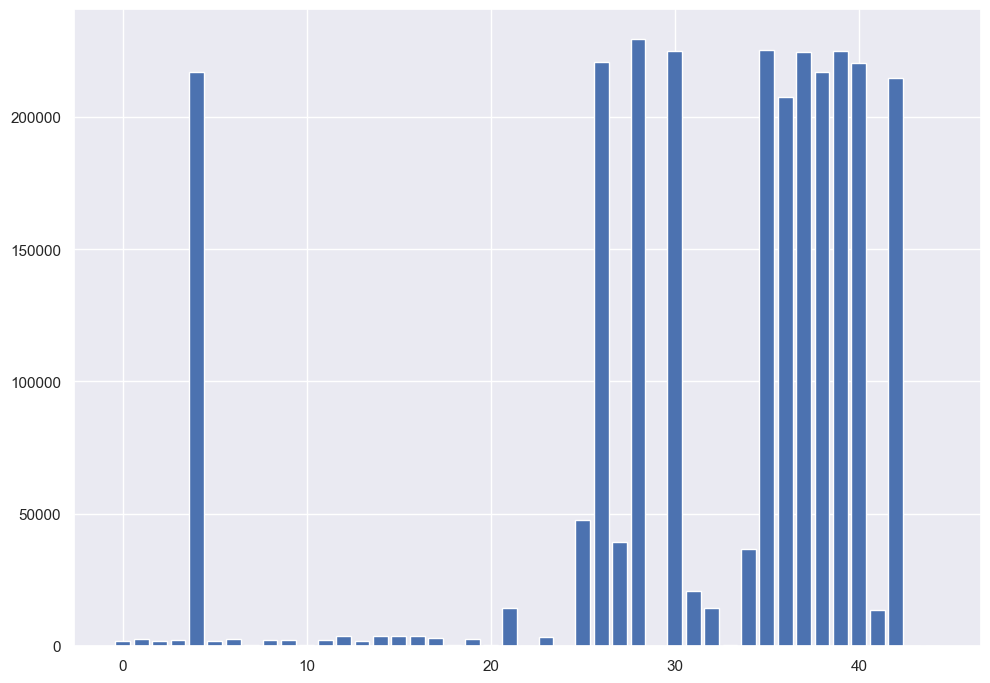

<class 'numpy.float64'>
1852.7426610209675
2755.932335102744
1716.6368373339822
2204.047033061327
216774.63773573708
1735.782381202084
2671.3962346656817
205.7949811700287
2240.0486422708464
2058.071481489994
277.0112310718219
2200.081859888773
3744.835303241517
1847.4642667021074
3625.686514268586
3804.421682971804
3644.923331735625
2828.002748179082
419.1180176958315
2703.1184370463634
156.2894214980293
14315.551011913565
3468.5016277748173
83.67245709781439
47604.23036302894
220705.50859141236
39353.987780502524
229283.269639308
224815.28898735179
20769.159557756102
14356.393045054318
433.26039232563835
36667.75426871664
225292.5546324425
207485.73743421538
224393.45339527784
216848.6763046037
224904.68320074017
220375.8728269647
13395.809652576263
214762.01618717643
85.79301894060612
65.48374645071782
Number of features : 45, Numbers of feature with a NOVA score = 0 : 2
0         1
1         1
2         1
3         1
4         1
         ..
932314    1
932315    1
932316    1
93231

In [8]:

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
sum = 0
print(type(fs.scores_[3]))
for i in range(len(fs.scores_)):
	if ((fs.scores_[i])>1.0):
		print(fs.scores_[i])
		sum +=1 
print('Number of features : %d, Numbers of feature with a NOVA score = 0 : %d' % (len(fs.scores_),len(fs.scores_)-sum))
# This features are the same as detected with a variance of 0 above but there are still some very low scores

# print(cols_numeric[31]) P403
# df = df.drop(columns=['P403']) 
print(df['P403'])

B. Information gain : calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
data = df[cols_numeric]
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
# # https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])


<AxesSubplot:>

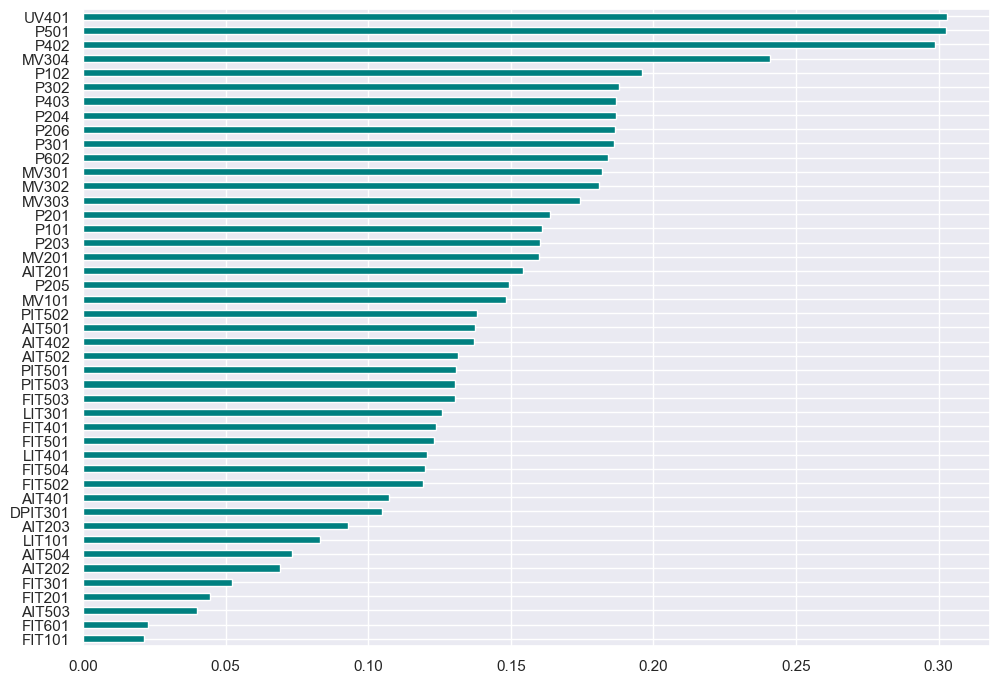

In [ ]:
feat_importances.sort_values(ascending=True).plot(kind='barh',color='teal')

C. Correlation Coefficient

<AxesSubplot:>

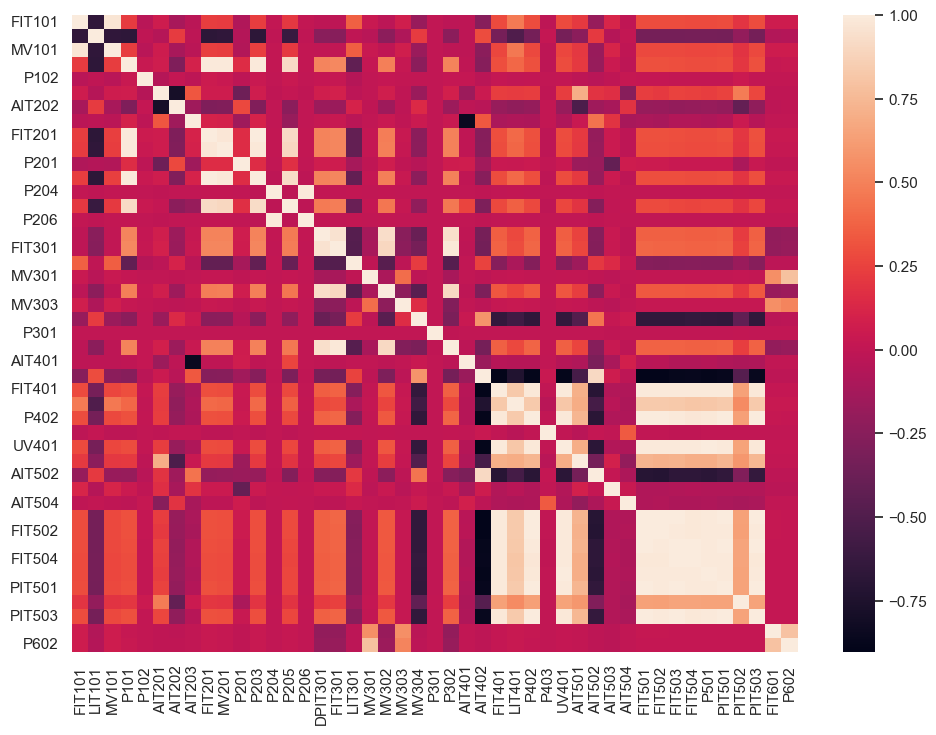

In [ ]:
cor = data.corr()
sns.heatmap(cor)

### 3rd method : Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

## **Normalization of dataset**

In [ ]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('Normal/Attack')
cols_numeric.remove('index')

mean normalization

In [ ]:
data = df[cols_numeric]
mean_normalized_df = (data-data.mean())/data.std()

min-max normalization

In [ ]:
data = df[cols_numeric]
min_max_normalized_df = (data-data.min())/(data.max()-data.min())

In [ ]:
df.to_pickle('dataset/train_dataset.pkl')